In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

## MNIST dataset and Imports

Exercise: _Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing)._

In [3]:
x_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [4]:
x_train[0].shape

(784,)

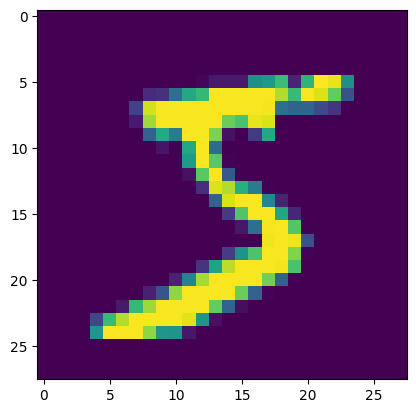

In [5]:
plt.imshow(x_train[0].reshape(28, 28))

Exercise: _Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set._

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
%time rf.fit(x_train, y_train)

CPU times: user 52.6 s, sys: 172 ms, total: 52.8 s
Wall time: 52.9 s


RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

Exercise: _Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%._

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train)

In [13]:
pca.n_components_

154

Exercise: _Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?_

In [12]:
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rf_pca.fit(x_train_reduced, y_train)

CPU times: user 1min 47s, sys: 5.86 ms, total: 1min 47s
Wall time: 1min 47s


RandomForestClassifier(random_state=42)

In [15]:
x_test_reduced = pca.transform(X_test)

accuracy_score(rf_pca.predict(x_test_reduced), y_test)

0.9488

## Trying SGDclassifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(x_train, y_train)

CPU times: user 2min 51s, sys: 2.37 s, total: 2min 53s
Wall time: 2min 53s


SGDClassifier(random_state=42)

In [19]:
sgd_pca = SGDClassifier(random_state=42)
%time sgd_pca.fit(x_train_reduced, y_train)

CPU times: user 46.2 s, sys: 17.6 ms, total: 46.3 s
Wall time: 46.3 s


SGDClassifier(random_state=42)

In [21]:
print(accuracy_score(sgd_clf.predict(X_test), y_test))
print(accuracy_score(sgd_pca.predict(x_test_reduced), y_test))

0.874
0.8959
